# Dataset Information

The dataset is provided by UCI Machine Learning via Kaggle at https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset. The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content:

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=properly paid on time, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
# Let's first explore the data. Before we load the data, load all required libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

#Load the CSV file into dataframeb
payment_data = pd.read_csv('data/UCI_Credit_Card.csv')
payment_data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#Some more visual checking
payment_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
payment_data.shape

(30000, 25)

In [6]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In the dataset given, default.payment.next.month is a dependent variable. All other variables are independent variables. 

In [7]:
print(payment_data['LIMIT_BAL'].min())
print(payment_data['LIMIT_BAL'].max())
print(payment_data['AGE'].min())
print(payment_data['AGE'].max())

10000.0
1000000.0
21
79


In [8]:
payment_data.groupby('default.payment.next.month').count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,...,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,...,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


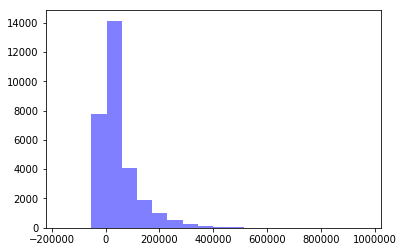

In [9]:
# Let's try histogram of one bill amount to see if it provides any insights
x = payment_data['BILL_AMT1']
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

No insights from above histogram. Same for other bill amounts as well. 

C:\Users\rammu_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


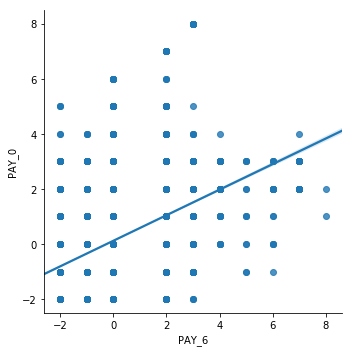

In [10]:
# Can we predict if a person is late in April would be most probably late in September as well? 
# Compare PAY_6 (payment status in April 2005) with PAY_0 (payment status in September 2005)

import seaborn as sns

# Plot a linear regression
sns.lmplot(x='PAY_6', y='PAY_0', data=payment_data)

# Display the plot
plt.show()

There is no definite correlation between repayment status in April vs September. However, we can interpret from above chart that most of the customers who were late in payment in April 2005 were late in September 2005 as well. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffcc5409b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffcc54a0b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffcc540860>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffcc54a748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffcc54aa90>],
 'means': []}

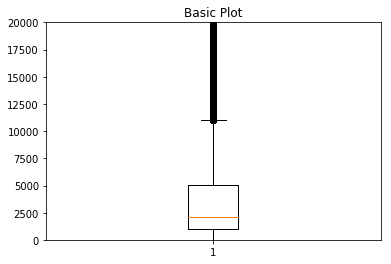

In [11]:
# Draw boxplot on couple of payment amounts to see if there is any pattern 

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffcc59d8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffcc59df98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffcc59d780>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffcc5a7668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffcc5a79b0>],
 'means': []}

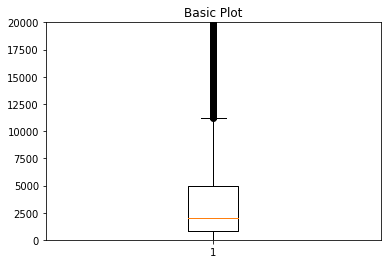

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffcc5fe550>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffcc5fec18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffcc5fe400>],
 'medians': [<matplotlib.lines.Line2D at 0x1ffcc6072e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ffcc607630>],
 'means': []}

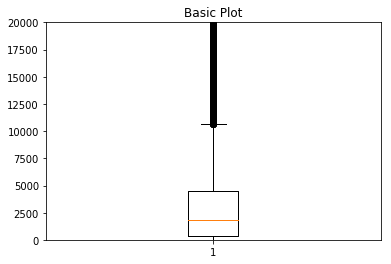

In [13]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT3'])

Boxplots for pay_amt1. pay_amt2 and pay_amt3 look same in terms of non-outliers. 
I suspect that it's going to look the same for other pay_amt

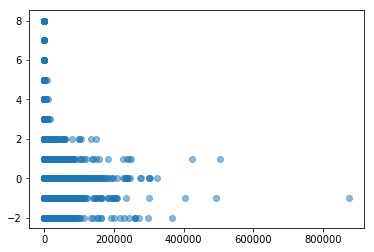

In [14]:
# Draw Scatterplot for payment status in September vs payment amount in September

# PAY_0: Repayment status in September, 2005 (-1=properly paid on time, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)
    
x = payment_data['PAY_AMT1']
y = payment_data['PAY_0']

plt.scatter(x, y, alpha=0.5)
plt.show()

As shown above when a customer pays less amount in a given month (especially less than 100,000 NT dollars), payment delays for that month goes up. This leads to an assumption that when the customer pays the card in full, there is less possibility of customer defaulting next month. It's only a speculation. There is no concrete evidence from above chart. 

Let's do a variation of above exercise to check if the variables PAY_0 and PAY_AMT1 are correlated. 

Null Hypothesis: There is no relationship between "PAY_AMT1" and "PAY_0". Alternate Hypothesis: There is a relationship between these two variables.

Significance Level: 99.9% Confidence (alpha = 0.01)

In [15]:
r, pvalue = stats.pearsonr(payment_data['PAY_AMT1'], payment_data['PAY_0'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis. There is a relationship between PAY_0 and PAY_AMT1')

Correlation: -0.0793,  p-value: 5.04e-43
Reject the Null Hypothesis. There is a relationship between PAY_0 and PAY_AMT1


Let's repeat the above experiment for PAY_2 and PAY_AMT2 and also for PAY_3 and PAY_AMT3

In [16]:
r, pvalue = stats.pearsonr(payment_data['PAY_AMT2'], payment_data['PAY_2'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis. There is a relationship between PAY_2 and PAY_AMT2')

Correlation: -0.0590,  p-value: 1.52e-24
Reject the Null Hypothesis. There is a relationship between PAY_2 and PAY_AMT2


In [17]:
r, pvalue = stats.pearsonr(payment_data['PAY_AMT3'], payment_data['PAY_3'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis. There is a relationship between PAY_3 and PAY_AMT3')

Correlation: -0.0533,  p-value: 2.47e-20
Reject the Null Hypothesis. There is a relationship between PAY_3 and PAY_AMT3


Based on above examples, payment amount for previous month is correlated with repayment status for current month. 

As shown in the story telling notebook (https://github.com/alexa-ai/sb-capstone-project1/blob/master/Story%20Telling%20--%20Predicting%20Default%20of%20Credit%20Card%20Clients.ipynb), there is a relationship between Education and default for next month payment. 

In [18]:
r, pvalue = stats.pearsonr(payment_data['LIMIT_BAL'], payment_data['default.payment.next.month'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis. There is a relationship between credit limit and defaulting on next month payment')

Correlation: -0.1535,  p-value: 1.30e-157
Reject the Null Hypothesis. There is a relationship between credit limit and defaulting on next month payment


Let's try the heatmap to understand the correlation between various fields and defaulting for next month payment. 

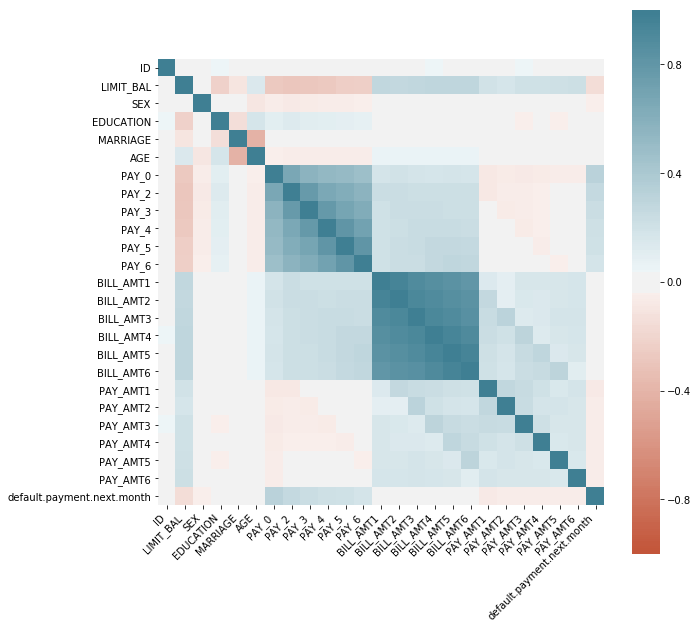

In [28]:
corr = payment_data.corr()
plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Scanning thru the diagram, it's obvious that we can remove the fields (like ID) which has no correlation at all with other variables. From the above heatmap, it appears that default.payment.next.month is strongly correlating with only PAY_x fields. 

Let's create another dataframe with only the desired columns. 

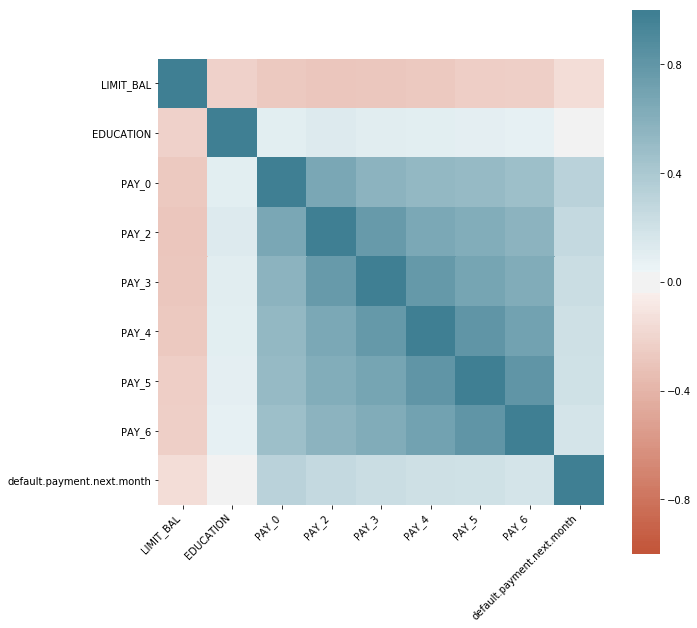

In [31]:
columns = ['LIMIT_BAL', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month'] 

corr = payment_data[columns].corr()
plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Based on the heatmap above, we can conclude that repayment status is the most reliable indicator of defaulting on payment next month. 

# Summary

I have analyzed various fields to determine if the independent variables relate to other independent variables, if independent variables correlate with dependent variable, etc., I have also calculated pearson correlation coefficient between various variables to determine if those correlate with each other. I have also used heatmaps to understand the correlation between various variables. 